In [1]:
##########################################################################
# Analysis script to monitor the performance of the issue assignment     #
# system. (Section 6 Monitoring Deterioration)                           #
#                                                                        #
# Uses an input file that includes daily accuracies.                     #
##########################################################################
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
import pandas

In [2]:
inputDatasetName = input("Please enter the name of the csv dataset to read:")

# Column names of the input file
CNAME_INP_DATE = "Date"
CNAME_INP_ACC = input("Please enter the name of the column in the dataset to be used as the input signal:")

Please enter the name of the csv dataset to read:daily_accuracy.csv
Please enter the name of the column in the dataset to be used as the input signal:AccuracyAll


In [3]:
# load the dataset
inputDataset = pandas.read_csv(inputDatasetName, delimiter=";")

In [4]:
# Use the "daily accuracy" column (CNAME_INP_ACC) as the input sample 
samples = np.asarray(inputDataset[CNAME_INP_ACC])
# signal and breakpoints are defined
signal, bkps = samples, [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

In [5]:
# PELT algorithm for change point detection
model = "l2"  # "l1", l2", "rbf"
algo = rpt.Pelt(model=model).fit(signal)

# Predict the change points
pen = 0.05 # Penalty parameter
my_bkps = algo.predict(pen=pen)
plotWOChangepoints = True # Set true to plot even if no change point is detected

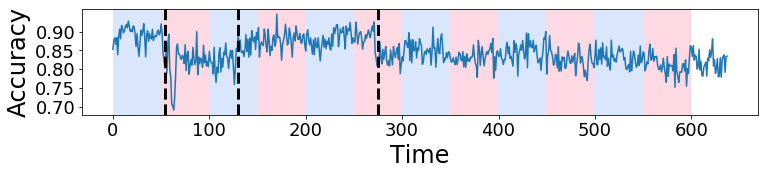

In [6]:
# Change point is detected if my_bkps[0] < len(samples)
if (my_bkps[0] < len(samples)) or plotWOChangepoints:  
    rpt.show.display(signal, bkps, my_bkps)
    plt.xlabel('Time', fontsize=24)
    plt.ylabel('Accuracy', fontsize=24)
    yticks = [0.70, 0.75, 0.80, 0.85, 0.90]
    plt.yticks(yticks, fontsize=18)
    plt.xticks(fontsize=18)
    plt.show()